In [2]:
import astropy.coordinates as coord
from astropy.io import fits
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from hq.data import filter_alldata

In [3]:
allstar, allvisit = filter_alldata(
    fits.getdata('/Users/apricewhelan/data/APOGEE_DR16/allStarLite-r12-l33.fits'),
    fits.getdata('/Users/apricewhelan/data/APOGEE_DR16/allVisit-r12-l33.fits'))

In [4]:
t = at.Table()
for col in ['APOGEE_ID', 'JD', 'VHELIO']:
    t[col] = allvisit[col]
df = t.to_pandas()

In [5]:
g = df.groupby('APOGEE_ID')

## Number counts:

In [6]:
nvisits = g['APOGEE_ID'].count()
(nvisits >= 10).sum()

16880

## Baseline:

In [7]:
baseline = g['JD'].apply(np.ptp)

/Users/apricewhelan/anaconda/envs/hq/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
np.percentile(baseline, [5, 50, 95])

array([  3.97228,  55.84573, 768.86938])

In [9]:
8 * np.percentile(baseline, 99)

14895.160960000008

Text(0, 0.5, 'number of sources')

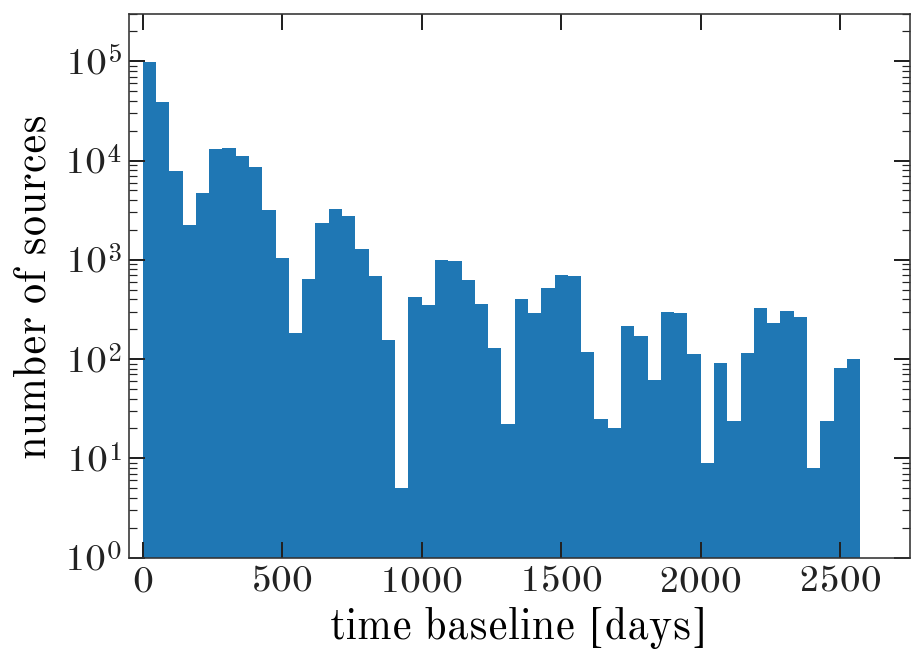

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.hist(baseline, bins=np.linspace(0, 3000, 64));
ax.set_yscale('log')
ax.set_xlim(-50, 2750)
ax.set_ylim(1e0, 3e5)
ax.set_xlabel('time baseline [days]')
ax.set_ylabel('number of sources')

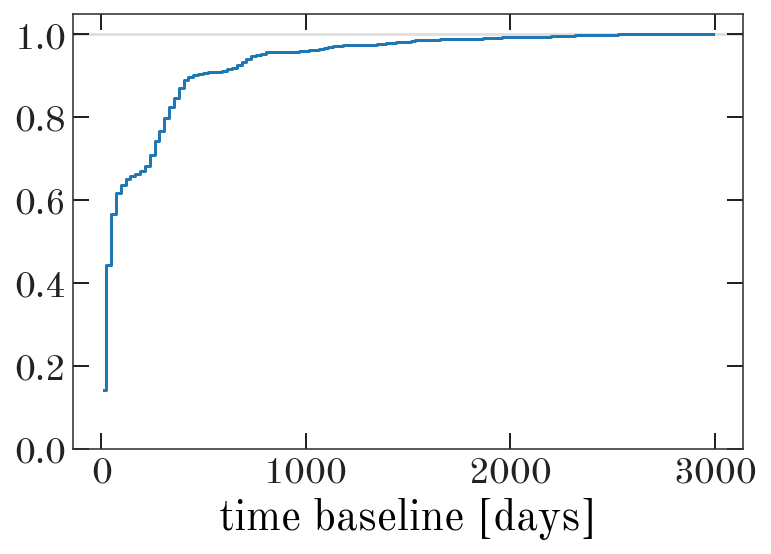

In [11]:
H, xe = np.histogram(baseline, bins=np.linspace(0, 3000, 128))
ctr = 0.5*(xe[:-1]+xe[1:])
plt.plot(ctr, np.cumsum(H) / H.sum(), marker='', drawstyle='steps-mid')
plt.ylim(0, 1.05)
plt.xlabel('time baseline [days]')
plt.axhline(1, zorder=-10, alpha=0.2)

## RV distribution


In [69]:
from scipy.stats import norm

(1e-06, 0.01)

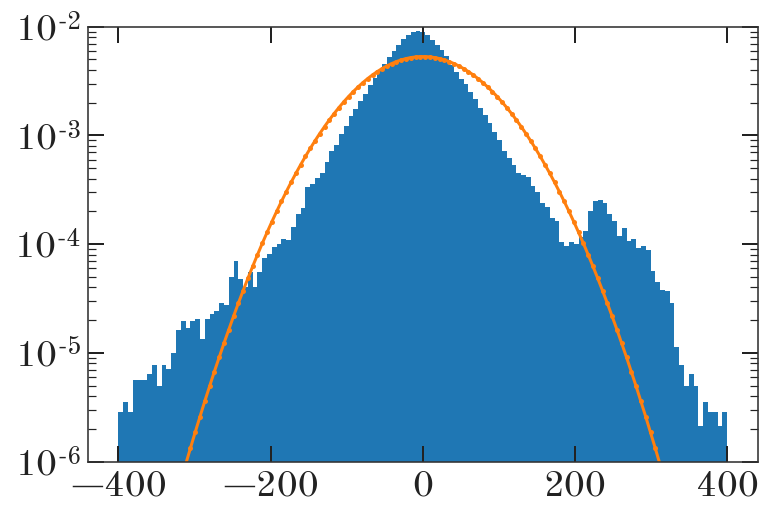

In [80]:
plt.hist(allstar['VHELIO_AVG'], 
         bins=np.linspace(-400, 400, 128), 
         density=True);

grid = np.linspace(-400, 400, 128)
plt.plot(grid, norm.pdf(grid, 0, 75))

plt.yscale('log')
plt.ylim(1e-6, 1e-2)